<a href="https://colab.research.google.com/github/rpradata-ud/DSPS_RPradata/blob/main/labs/class11_6_imageProcessingKmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# utility NB for clustering lecture

In [ ]:
__author__ = 'fbb'
%pylab inline
import numpy as np
import pylab as pl
#import kmseg
import sklearn.cluster
from sklearn import mixture
from PIL import Image
from skimage.io import imread

import warnings
warnings.filterwarnings(action='once')

from scipy.cluster.vq import kmeans2
import json
import os
#pl.style.use("https://raw.githubusercontent.com/fedhere/MLPNS2021/master/fbb.mplstyle")
pl.rcParams['font.size'] = 20
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

Populating the interactive namespace from numpy and matplotlib


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


# Clustering for compressing and dimensionality reduction


## meet Akuma @akumadog

In [ ]:
from google.colab import drive
drive.mount('/content/drive')#, force_remount=True)

/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


In [ ]:
cd /content/drive/Shareddrives/DSPS2021/

[Errno 2] No such file or directory: '/content/drive/Shareddrives/DSPS2021/'
/content


In [ ]:
!ls

drive  sample_data


In [ ]:
imread("10802534_761689917241346_821292660_n.jpg").shape

FileNotFoundError: ignored

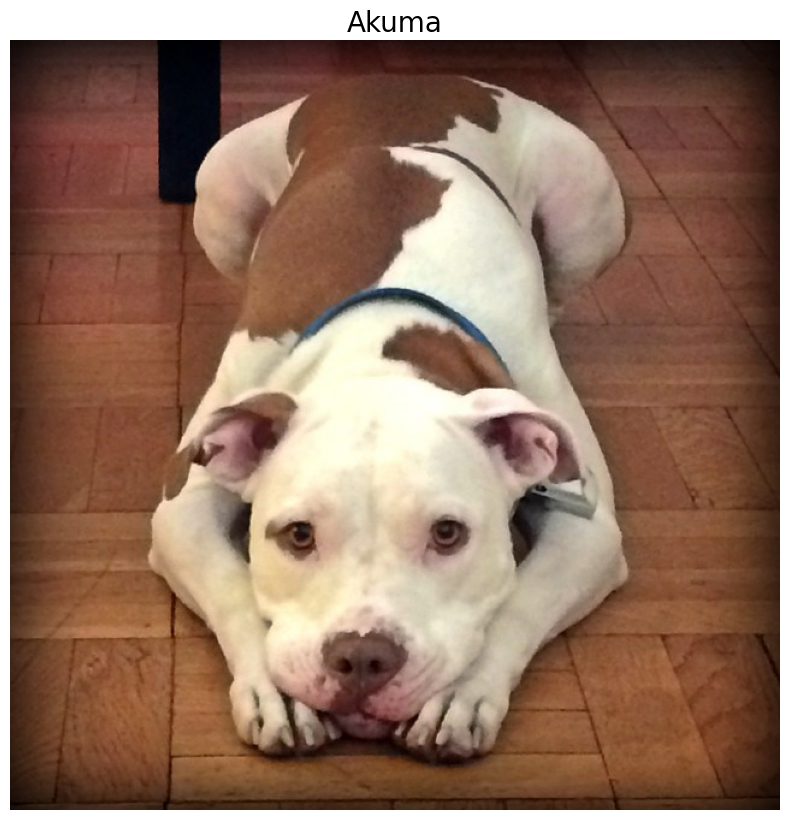

In [ ]:
im = imread("10802534_761689917241346_821292660_n.jpg")
pl.figure(figsize=(10,10))
pl.imshow(im)
im.shape
red = im[:,:,0]
green = im[:,:,1]
blue = im[:,:,2]
pl.title("Akuma", fontsize=20)
pl.grid(False)
pl.axis('off')
pl.savefig("ak0.png")

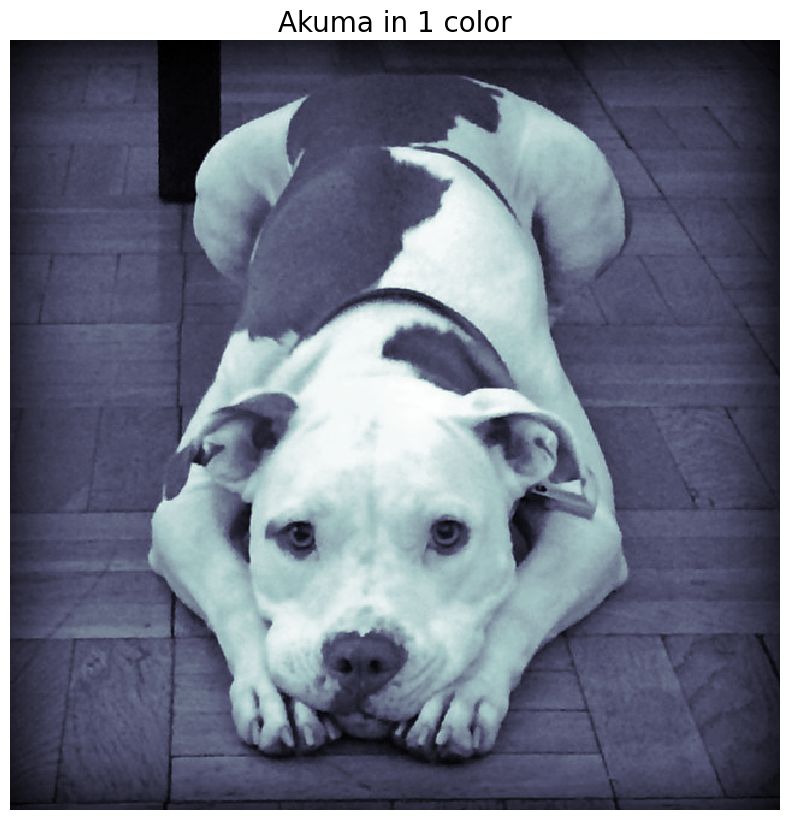

In [ ]:
pl.figure(figsize=(10,10))


samples = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])
pl.imshow(samples.mean(axis=1).reshape(red.shape), cmap='bone', interpolation='Nearest')
pl.title("Akuma in 1 color", fontsize=20)
pl.axis('off')
pl.savefig("ak1.png")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


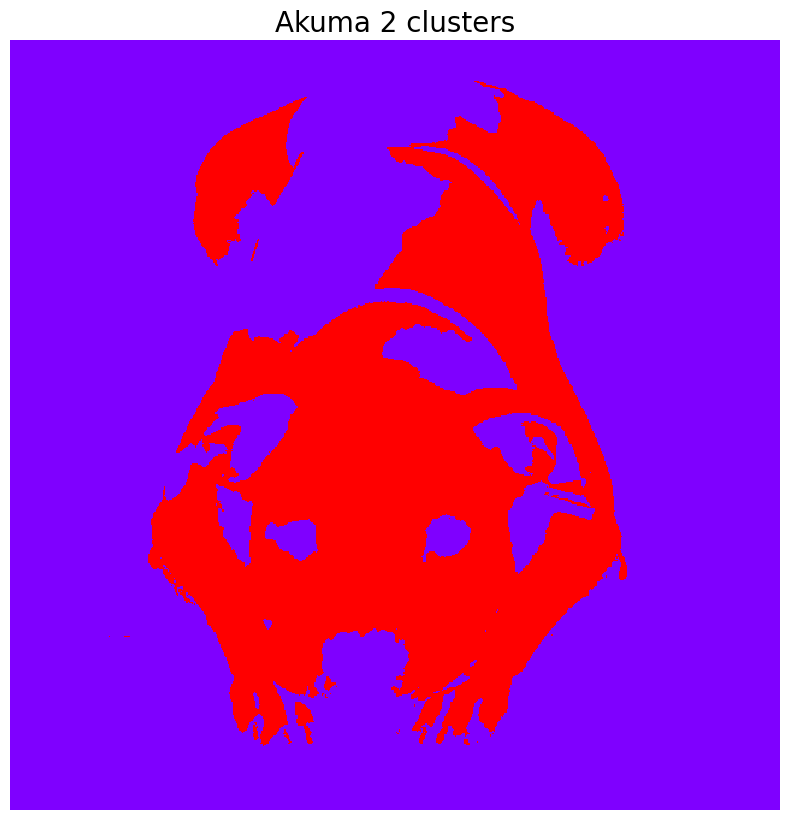

In [ ]:
pl.figure(figsize=(10,10))


nc = 2
samples = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])
clf = sklearn.cluster.KMeans(n_clusters=nc)
labels = clf.fit_predict(samples).reshape(red.shape)
pl.imshow(labels, cmap='rainbow', interpolation='Nearest')
pl.title("Akuma %d clusters"%nc, fontsize=20)
pl.axis('off')
pl.savefig("ak1.png")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


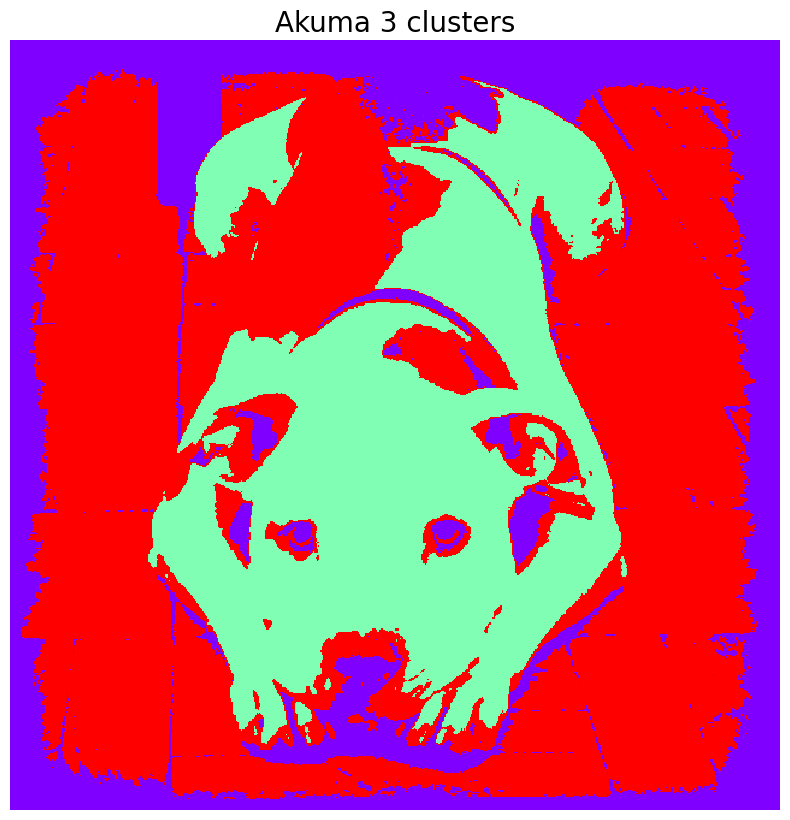

In [ ]:
pl.figure(figsize=(10,10))


nc=3
samples = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])
clf = sklearn.cluster.KMeans(n_clusters=nc)
labels = clf.fit_predict(samples).reshape(red.shape)
pl.imshow(labels, cmap='rainbow', interpolation='Nearest')
pl.title("Akuma %d clusters"%nc, fontsize=20)
pl.axis('off')
pl.savefig("ak2.png")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


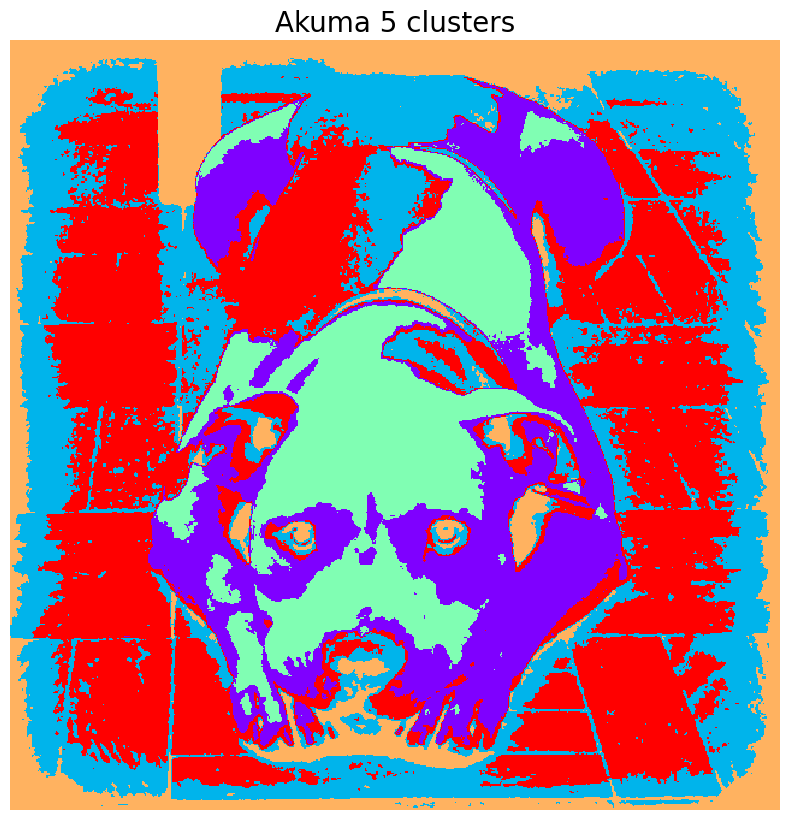

In [ ]:
pl.figure(figsize=(10,10))


nc = 5
samples = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])
clf = sklearn.cluster.KMeans(n_clusters=nc)
labels = clf.fit_predict(samples).reshape(red.shape)
pl.imshow(labels, cmap='rainbow', interpolation='Nearest')
pl.title("Akuma %d clusters"%nc, fontsize=20)
pl.axis('off')
pl.savefig("ak3.png")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


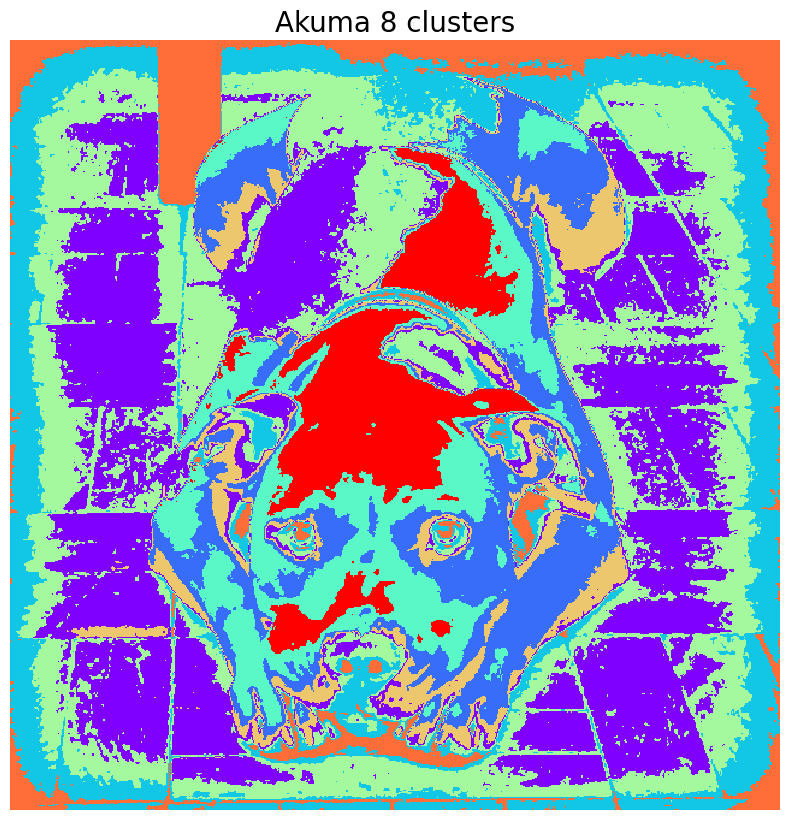

In [ ]:
pl.figure(figsize=(10,10))
nc = 8
samples = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])
clf = sklearn.cluster.KMeans(n_clusters=nc)
labels = clf.fit_predict(samples).reshape(red.shape)
pl.imshow(labels, cmap='rainbow', interpolation='Nearest')
pl.title("Akuma %d clusters"%nc, fontsize=20)
pl.axis('off')
pl.savefig("ak4.png")


In [ ]:
#i am using subprocess to get the size of the files through a command line
#unlike os.system, which also runs command lines, subprocess allows one
#to capture the return output and errors of the command line
#by piping stdoin, stdout, stderr
#!ls -l ak?.png
#os.system("ls -l ak.png")
from subprocess import Popen
from subprocess import PIPE
localpath = os.getcwd()
for i in range(5):
    p = Popen(['ls', '-lh', localpath+'/ak%d.png'%i], stdin=PIPE, stdout=PIPE, stderr=PIPE)
    output, err = p.communicate(b"size of images")
    print (output, err)

b'-rw------- 1 root root 657K Nov  6 19:35 /content/drive/Shareddrives/DSPS2021/ak0.png\n' b''
b'-rw------- 1 root root 20K Nov  6 19:37 /content/drive/Shareddrives/DSPS2021/ak1.png\n' b''
b'-rw------- 1 root root 35K Nov  6 19:37 /content/drive/Shareddrives/DSPS2021/ak2.png\n' b''
b'-rw------- 1 root root 58K Nov  6 19:37 /content/drive/Shareddrives/DSPS2021/ak3.png\n' b''
b'-rw------- 1 root root 81K Nov  6 19:37 /content/drive/Shareddrives/DSPS2021/ak4.png\n' b''


## Urban images:  finding windows in the UO images

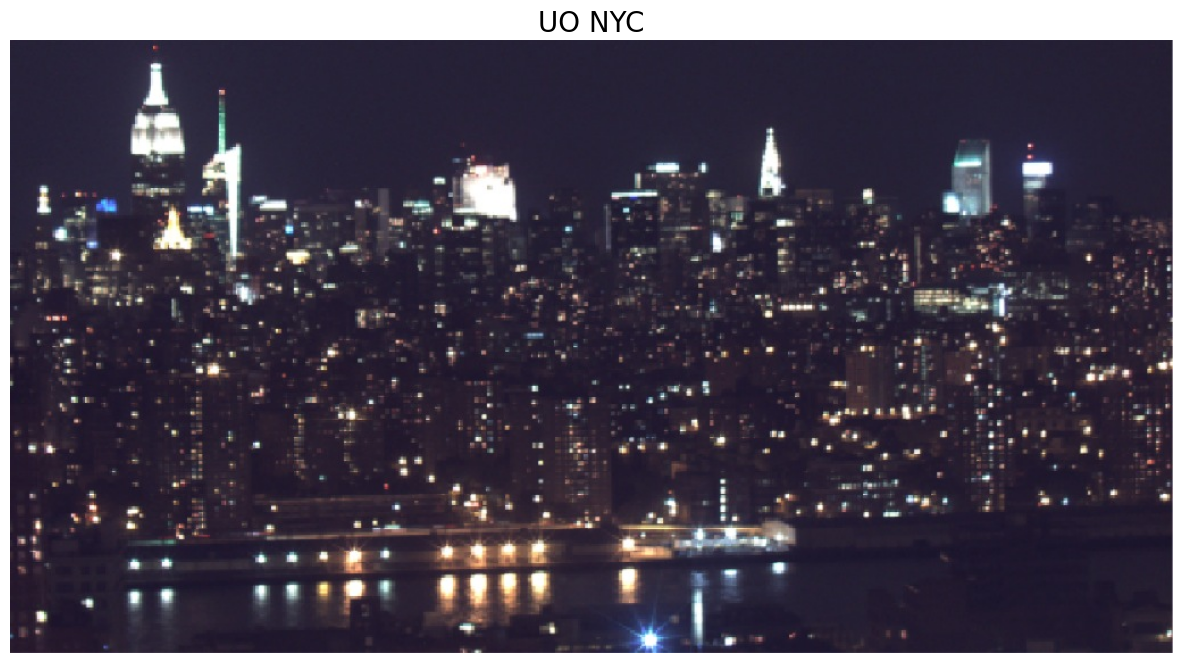

In [ ]:
fig = pl.figure(figsize = (15,15))
im = imread("uo_img.jpg")
jpgfile = Image.open("uo_img.jpg")
col, row =  jpgfile.size
m = imread("uo_img.jpg")
pl.imshow(im)
pl.title("UO NYC", fontsize=20)
pl.axis('off')
red = im[:,:,0]
green = im[:,:,1]
blue = im[:,:,2]



In [ ]:
# show the three channels
pl.figure(figsize = (15,15))
pl.imshow(red, cmap="bone")
pl.axis('off')
pl.title("UO NYC red channel", fontsize=20)
pl.figure(figsize = (15,15))
pl.imshow(green, cmap="bone")
pl.axis('off')
pl.title("UO NYC green channel", fontsize=20)
pl.figure(figsize = (15,15))
pl.imshow(blue, cmap="bone")
pl.axis('off')
pl.title("UO NYC blue channel", fontsize=20)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'UO NYC 2 clusters')

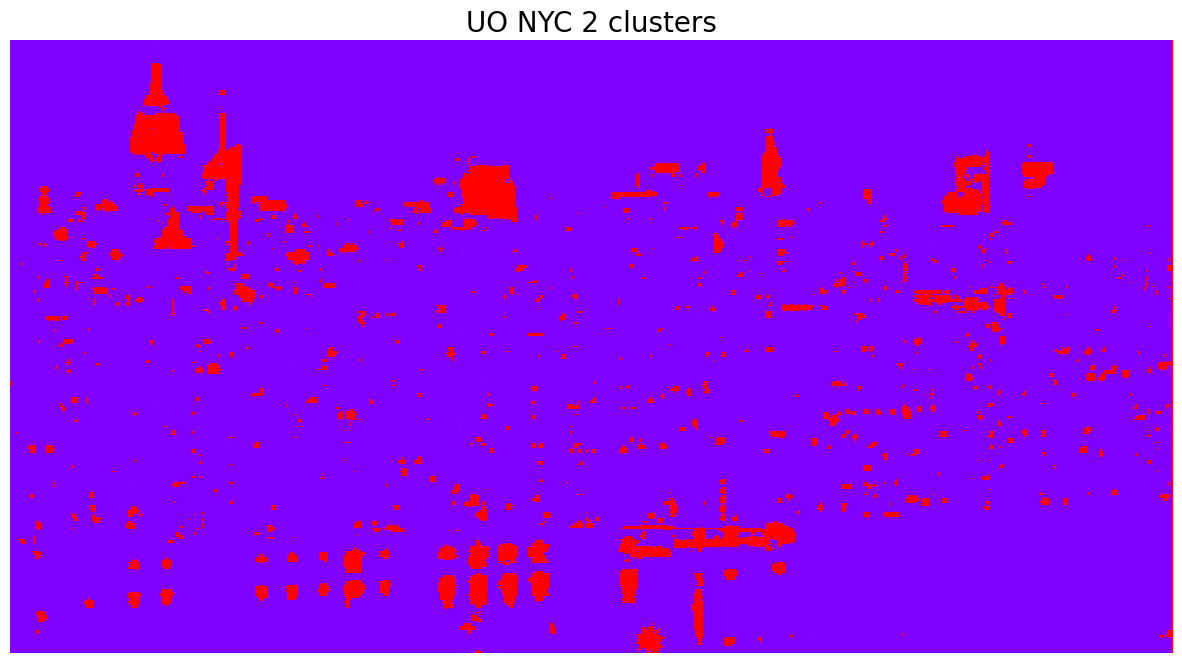

In [ ]:

pl.figure(figsize = (15,15))

nc = 2
samples = np.column_stack([red.flatten(), green.flatten(), blue.flatten()])
clf = sklearn.cluster.KMeans(n_clusters=nc)
labels = clf.fit_predict(samples).reshape(red.shape)
pl.imshow(labels, cmap='rainbow', interpolation='Nearest')
pl.axis('off')
pl.title("UO NYC %d clusters"%nc, fontsize=20)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'UO NYC 5 clusters')

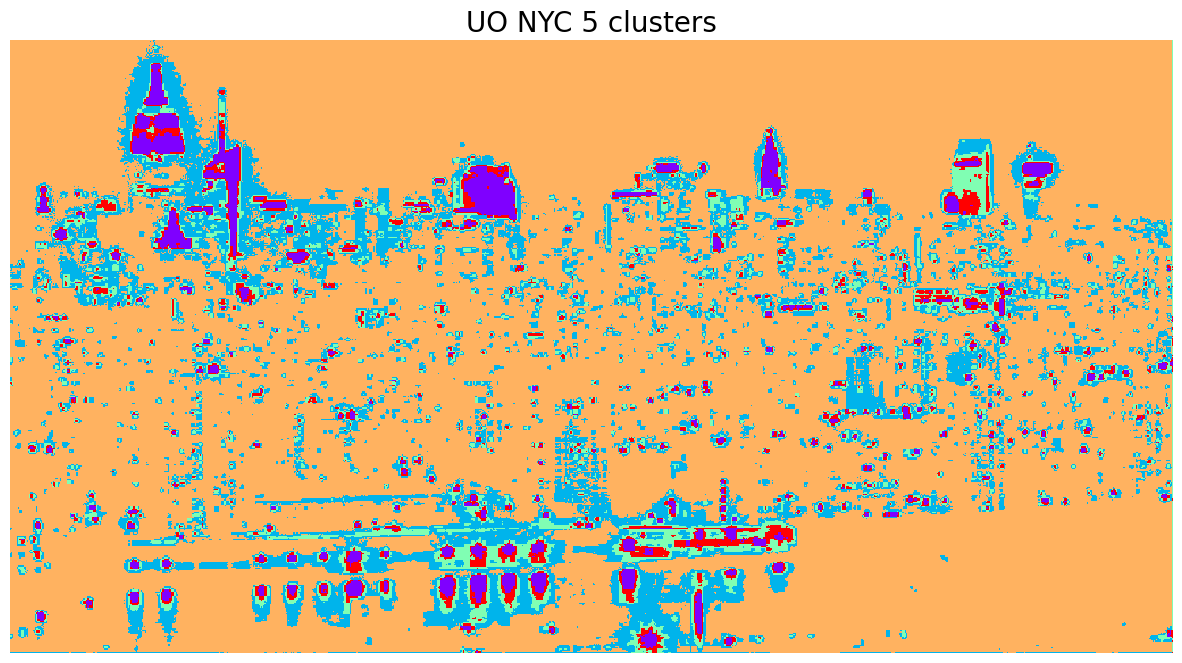

In [ ]:
nc = 5
pl.figure(figsize = (15,15))
clf = sklearn.cluster.KMeans(n_clusters=nc)
labels = clf.fit_predict(samples).reshape(red.shape)

pl.imshow(labels, cmap='rainbow', interpolation='Nearest')
pl.axis('off')
pl.title("UO NYC %d clusters"%nc, fontsize=20)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'UO NYC 10 clusters')

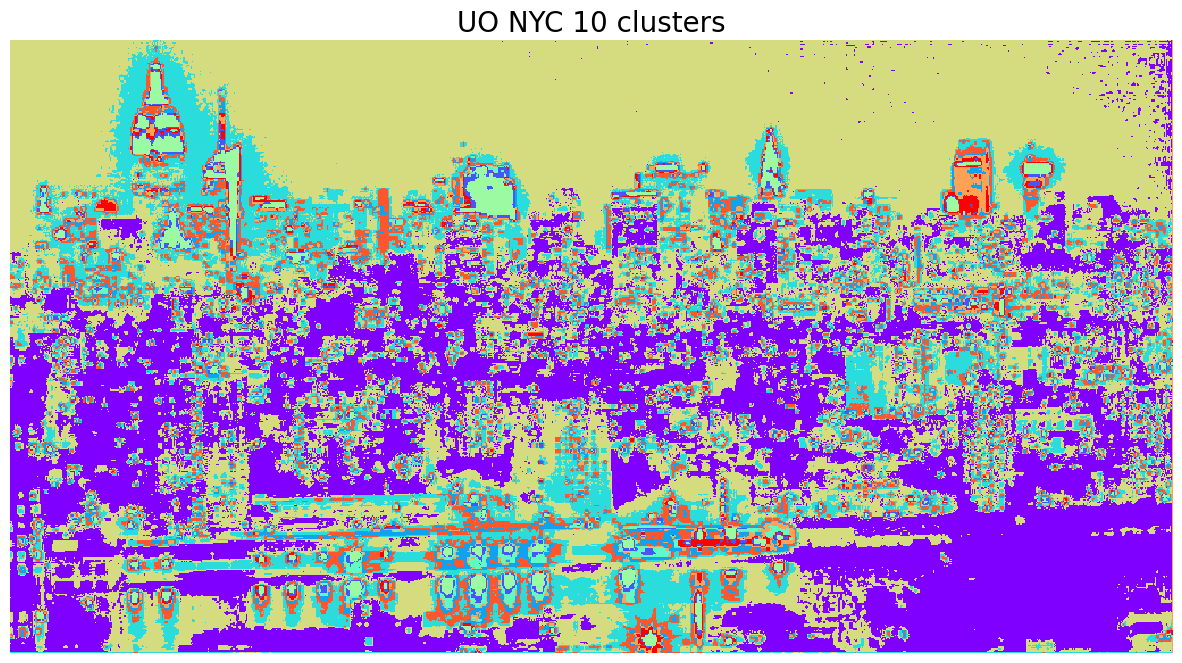

In [ ]:
nc = 10
pl.figure(figsize = (15,15))
clf = sklearn.cluster.KMeans(n_clusters=nc)
labels = clf.fit_predict(samples).reshape(red.shape)
pl.imshow(labels, cmap='rainbow', interpolation='Nearest')
pl.axis('off')
pl.title("UO NYC %d clusters"%nc, fontsize=20)
